In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import sklearn.metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import hamming_loss, jaccard_score
from sklearn.metrics import f1_score
from kmodes.kmodes import KModes
from sklearn.model_selection import GridSearchCV

In [2]:
hurto_tp=pd.read_csv("../datasets_clean/hurto_tpc.csv", delimiter=";", encoding="utf-8")
hurto_ml = hurto_tp 
df1 = hurto_tp 

In [3]:
df1 = df1.drop(['Fecha','Sexo','Edad','Año'], axis=1)

In [4]:
km = KModes(n_clusters=3, init="Huang", n_init=10,verbose=1)
df1.fillna("Desconocido", inplace = True)
df1 = df1.astype(str)
clusters= km.fit_predict(df1)

print("Centroides de los clusters")
print(km.cluster_centroids_)
print("Clusters asignados a cada punto de datos:")
print(clusters)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 8547, cost: 74651.0
Run 1, iteration: 2/100, moves: 7160, cost: 71106.0
Run 1, iteration: 3/100, moves: 3908, cost: 67660.0
Run 1, iteration: 4/100, moves: 3614, cost: 65827.0
Run 1, iteration: 5/100, moves: 213, cost: 65827.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 6936, cost: 68610.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 9475, cost: 69184.0
Run 3, iteration: 2/100, moves: 4198, cost: 69184.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 6678, cost: 70777.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 2875, cost: 71889.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
R

In [5]:
# Codificar variables categóricas (como Sexo, Estado_civil, Transporte, Modalidad, Conducta, Comuna, Lugar, Bien)
categorical_cols = ['Sexo', 'Estado_civil', 'Transporte', 'Modalidad', 'Conducta', 'Comuna', 'Lugar', 'Bien']
label_encoders = {}
n=0
for col in categorical_cols:
    le = LabelEncoder()
    hurto_ml[col] = le.fit_transform(hurto_ml[col])
    label_encoders[col] = le
    n = n+1
    if n == 1:
        genero = label_encoders[col]
    if n == 2:
        estado_civil = label_encoders[col]
    if n == 3:
        transporte = label_encoders[col]
    if n == 4:
        modalidad = label_encoders[col]
    if n == 5:
        conducta = label_encoders[col]
    if n == 6:
        comuna = label_encoders[col]
    if n == 7:
        lugar = label_encoders[col]
    if n == 8:
        bien = label_encoders[col]

In [6]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X = hurto_ml.drop(['Fecha','Sexo'], axis=1)  # Elimina las columnas
y = hurto_ml['Sexo']  # Define tu objetivo, en este caso 'Sexo'

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
def compare_metrics(learners,X,y,metrics,train_size,repeats):
    strlearners=[]
    for i in range(0,len(learners)):
        strlearners.append(str(learners[i]))  
    df=pd.DataFrame(columns=metrics,index=strlearners)
    for i in range (0,len(learners)):
        for j in range(0,len(metrics)):
            scores=[]
            for k in range(repeats):
                X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, train_size=train_size)
                learners[i].fit(X_train,y_train)
                y_hat = learners[i].predict(X_test)
                y_prob = learners[i].predict_proba(X_test)
                if metrics[j]=="Log loss":
                    scores.append(sklearn.metrics.log_loss(y_test, y_prob))
                if metrics[j]=="Brier Score Loss":
                    scores.append(sklearn.metrics.brier_score_loss(y_test, y_prob[:,1]))
                if metrics[j]=="Accuracy":
                    scores.append(sklearn.metrics.accuracy_score(y_test, y_hat))
                if metrics[j]=="Precision":
                    scores.append(sklearn.metrics.precision_score(y_test, y_hat))
                if metrics[j]=="F1":
                    scores.append(sklearn.metrics.f1_score(y_test, y_hat))
                if metrics[j]=="Recall":
                    scores.append(sklearn.metrics.recall_score(y_test, y_hat))
                if metrics[j]=="Auroc":
                    scores.append(sklearn.metrics.roc_auc_score(y_test, y_prob[:,1]))
            df.iloc[i,j]=np.mean(scores)
    return df

In [8]:
metricas=["Log loss","Brier Score Loss","Accuracy","Precision","F1","Recall","Auroc"]
decision_tree=DecisionTreeClassifier()
naive_bayes=GaussianNB()
kNN=KNeighborsClassifier()
log_regression = LogisticRegression()
RandomForest = RandomForestClassifier()
elearn=[decision_tree,naive_bayes,kNN,log_regression,RandomForest]

In [9]:
#hurto_ml_scores  = compare_metrics(elearn,X,y,metricas,0.8,20)
#hurto_ml_scores

##### Multietiqueta

In [10]:
bins = [-1, 12, 18, 30, 60, float('inf')]
labels = ['Niño', 'Adolescente', 'Adulto joven', 'Adulto', 'Adulto mayor']

# Utiliza pd.cut para crear los intervalos y asignar las etiquetas
hurto_ml['grupo_edad'] = pd.cut(hurto_ml['Edad'], bins=bins, labels=labels, right=False)

In [11]:
categorical_cols = ['grupo_edad']
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    hurto_ml[col] = le.fit_transform(hurto_ml[col])
    label_encoders[col] = le

In [12]:
# Dividir el conjunto de datos en características (X) y etiquetas (y)
X = hurto_ml.drop(['Fecha', 'grupo_edad', 'Sexo','Edad','Año'], axis=1)
y = list(zip(hurto_ml['grupo_edad'],hurto_ml['Sexo']))

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear un clasificador multi-etiqueta (por ejemplo, Random Forest)
classifier = MultiOutputClassifier(RandomForestClassifier(n_estimators=100, random_state=42))

# Entrenar el modelo
classifier.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = classifier.predict(X_test)

# Evaluar el rendimiento del modelo
print(classifier.score(X_train, np.array(y_train)))

0.6914085330216247


Definición de función para la identificación de hiperparámetros óptimos mediante grid_search

In [13]:
# param_grid = {
#     'estimator__n_estimators': [100, 200, 300],
#     'estimator__max_depth': [None, 10, 20, 30]
# }

# grid_search = GridSearchCV(
#     estimator=classifier,
#     param_grid=param_grid,
#     scoring='accuracy',  # Cambia la métrica según tus necesidades
#     cv=5
# )

Ejecución 

In [14]:
#grid_search.fit(X_train, y_train)

In [15]:
# best_params = grid_search.best_params_
# best_params

In [16]:
# best_estimator = grid_search.best_estimator_
# best_estimator

Generación de bibliotecas para manejo de inputs e interpretación de outputs

In [17]:
# B_grupo_edad = {1:'Adulto', 2:'Adulto joven',3:'Adulto mayor',0:'Adolescente',4:'Niño'}
# B_genero = {0:'Hombre', 1:'Mujer'}

In [18]:
# mapeo_categorias = dict(zip(estado_civil.classes_, estado_civil.transform(estado_civil.classes_)))
# valor_codificado = 3 # Reemplaza con el valor codificado que deseas revertir
# valor_original = [key for key, value in mapeo_categorias.items() if value == valor_codificado][0]
# valor_original 

In [19]:
# mapeo_categorias = dict(zip(transporte.classes_, transporte.transform(transporte.classes_)))
# valor_codificado = 0 # Reemplaza con el valor codificado que deseas revertir
# valor_original = [key for key, value in mapeo_categorias.items() if value == valor_codificado][0]
# valor_original 

In [20]:
# mapeo_categorias = dict(zip(modalidad.classes_, modalidad.transform(modalidad.classes_)))
# valor_codificado = 3 # Reemplaza con el valor codificado que deseas revertir
# valor_original = [key for key, value in mapeo_categorias.items() if value == valor_codificado][0]
# valor_original 

In [21]:
# mapeo_categorias = dict(zip(conducta.classes_, conducta.transform(conducta.classes_)))
# valor_codificado = 11 # Reemplaza con el valor codificado que deseas revertir
# valor_original = [key for key, value in mapeo_categorias.items() if value == valor_codificado][0]
# valor_original 

In [22]:
# mapeo_categorias = dict(zip(comuna.classes_, comuna.transform(comuna.classes_)))
# valor_codificado = 9 # Reemplaza con el valor codificado que deseas revertir
# valor_original = [key for key, value in mapeo_categorias.items() if value == valor_codificado][0]
# valor_original 

In [23]:
# mapeo_categorias = dict(zip(lugar.classes_, lugar.transform(lugar.classes_)))
# valor_codificado = 9 # Reemplaza con el valor codificado que deseas revertir
# valor_original = [key for key, value in mapeo_categorias.items() if value == valor_codificado][0]
# valor_original 

In [24]:
# mapeo_categorias = dict(zip(bien.classes_, bien.transform(bien.classes_)))
# valor_codificado =  43 # Reemplaza con el valor codificado que deseas revertir
# valor_original = [key for key, value in mapeo_categorias.items() if value == valor_codificado][0]
# valor_original

Generación de Input para clasificación

In [25]:
# test = [(3,0,3,11,9,9,43)]

Predicción

In [26]:
# y_pred = classifier.predict(test)
# print('Género predicción:', B_genero[y_pred[0, 1]],'\n','Grupo edad predicción:', B_grupo_edad[y_pred[0, 0]])

Cargue del modelo en formato PKL

In [27]:
import pickle

with open("../api_generation/model.pkl","wb") as archivo:
    pickle.dump(classifier,archivo)

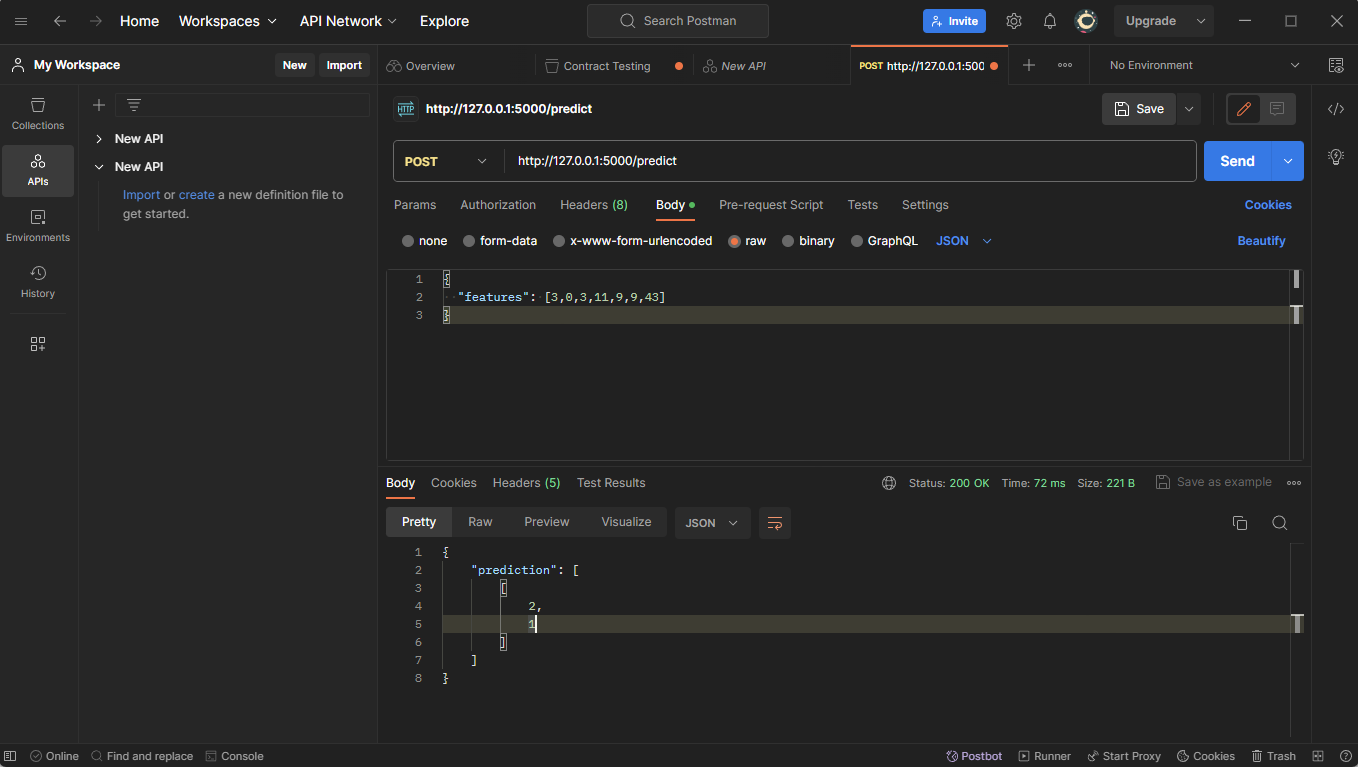